In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

import math

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

%matplotlib inline
import matplotlib.pyplot as plt

RANDOM_SEED = 6    # Set a random seed for reproducibility!

In [2]:
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)
print("features_df.shape", features_df.shape)
features_df.head()

features_df.shape (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [4]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)
#Uncomment for 2 Log reg or Random forest and pick 1 estimator
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1) #Uncomment to use Log reg
    #estimator=RandomForestClassifier(random_state=0) #100 trees default, Uncomment to use Random Tree 
)

#Uncomment for Lasso
# estimators = MultiOutputRegressor(
#     estimator = linear_model.Lasso(alpha=0.5) #Can change Alpha and weight of regularization term
# )

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [18]:
#Training/testing on all data
# X_train, X_eval, y_train, y_eval = train_test_split(
#     features_df,
#     labels_df,
#     test_size=0.33,
#     shuffle=True,
#     stratify=labels_df,
#     random_state=RANDOM_SEED
# )

In [6]:
# Train model on all data
# full_pipeline.fit(X_train, y_train)
# preds = full_pipeline.predict_proba(X_eval)

# y_preds = pd.DataFrame(
#     {
#         "h1n1_vaccine": preds[0][:, 1],
#         "seasonal_vaccine": preds[1][:, 1],
#     },
#     index = y_eval.index)
# #Overall MSE and ROC
# print(mean_squared_error(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine']))
# print(roc_auc_score(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine']))

0.12069926994728068
0.8277931524204213


In [5]:
#Get data on each race:
black = features_df.loc[features_df['race'] == "Black"]
black_labels = labels_df.iloc[[i for i in list(black.index)]]
print(len(black_labels))

white = features_df.loc[features_df['race'] == "White"]
white_labels = labels_df.iloc[[i for i in list(white.index)]]
print(len(white_labels))

hispanic = features_df.loc[features_df['race'] == "Hispanic"]
hispanic_labels = labels_df.iloc[[i for i in list(hispanic.index)]]
print(len(hispanic_labels))

2118
21222
1755


White MSE 0.12059000532944969
White AUC h1n1 0.8354629277565406
White AUC Seasonal 0.8409027380427544
Black MSE 0.11364306948463275
Black AUC h1n1 0.7210730446024564
Black AUC Seasonal 0.8045401420480087
Hispanic MSE 0.14376152398222256
Hispanic AUC h1n1 0.7426673148598281
Hispanic AUC Seasonal 0.7407058885899458


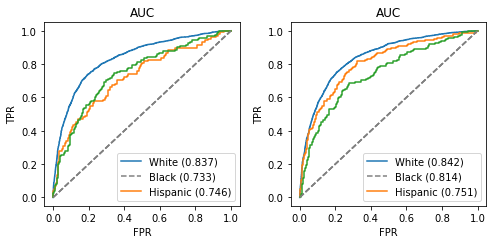

In [14]:
#Train and test per each race
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
races = [white, black, hispanic]
races_labels = [white_labels, black_labels, hispanic_labels]
names = ["White", "Black", "Hispanic"]
for race in range(len(races)):
    X_train, X_eval, y_train, y_eval = train_test_split(
    races[race],
    races_labels[race],
    test_size=0.33,
    shuffle=True,
    stratify=races_labels[race],
    random_state=RANDOM_SEED
    )
    full_pipeline.fit(X_train, y_train)
    preds = cross_val_predict(full_pipeline, X_eval, y_eval, cv=5, method='predict_proba') #For Log and Random Forest
    #preds = cross_val_predict(full_pipeline, X_eval, y_eval, cv=5, method='predict') #For Lasso

    #y_preds for Random forest and Log reg
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
   index = y_eval.index)

# #y_preds for Lasso
#     y_preds = pd.DataFrame(
#     {
#         "h1n1_vaccine": preds[:, 0],
#         "seasonal_vaccine": preds[:,1],
#     },
#     index = y_eval.index)
    
    print(names[race], "MSE", mean_squared_error(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine'])) #Not super meaningful for Lasso
    print(names[race], "AUC h1n1", roc_auc_score(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine']))
    print(names[race], "AUC Seasonal", roc_auc_score(y_eval['seasonal_vaccine'], y_preds['seasonal_vaccine']))
    
    #Plotting combined AUC
    fpr, tpr, thresholds = roc_curve(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine'])
    ax[0].plot(fpr, tpr)

    fpr, tpr, thresholds = roc_curve(y_eval['seasonal_vaccine'], y_preds['seasonal_vaccine'])
    ax[1].plot(fpr, tpr)
    
    ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[0].set_ylabel('TPR')
    ax[0].set_xlabel('FPR')
    ax[0].set_title(
        "H1N1 AUC"
    )
    ax[0].legend(["White (0.837)","Black (0.733)", "Hispanic (0.746)"])

    ax[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title(
        "Seasonal Flu AUC")

    ax[1].legend(["White (0.842)","Black (0.814)", "Hispanic (0.751)"])

fig.tight_layout()

    

In [15]:
#Data for each gender:
female = features_df.loc[features_df['sex'] == "Female"]
female_labels = labels_df.iloc[[i for i in list(female.index)]]
print(len(female_labels))

male = features_df.loc[features_df['sex'] == "Male"]
male_labels = labels_df.iloc[[i for i in list(male.index)]]
print(len(male_labels))

15858
10849


Female 0.1211588692320471
Female 0.8357714067791373
Female 0.8321299346428133
Male 0.1264967164935417
Male 0.7880670621928887
Male 0.8179590209091376


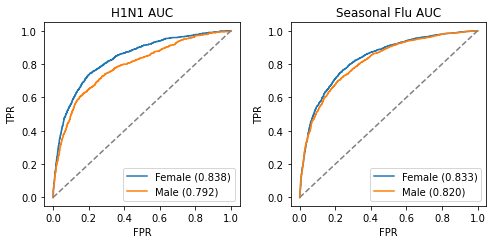

In [18]:
#Train/test for each gender 
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
genders = [female, male]
genders_labels = [female_labels, male_labels]
names = ["Female", "Male"]
for gender in range(len(genders)):
    X_train, X_eval, y_train, y_eval = train_test_split(
        genders[gender],
        genders_labels[gender],
        test_size=0.33,
        shuffle=True,
        stratify=genders_labels[gender],
        random_state=RANDOM_SEED
    )
    full_pipeline.fit(X_train, y_train)
    preds = cross_val_predict(full_pipeline, X_eval, y_eval, cv=5, method='predict_proba') #For Log and Random Forest
    #preds = cross_val_predict(full_pipeline, X_eval, y_eval, cv=5, method='predict') #For Lasso

#y_preds for Random forest and Log reg (Uncomment)
    y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
   index = y_eval.index)

#y_preds for Lasso (Uncomment)
#     y_preds = pd.DataFrame(
#     {
#         "h1n1_vaccine": preds[:, 0],
#         "seasonal_vaccine": preds[:,1],
#     },
#     index = y_eval.index)
    #Overall MSE and ROC
    print(names[gender], mean_squared_error(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine']))
    print(names[gender], roc_auc_score(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine']))
    print(names[gender], roc_auc_score(y_eval['seasonal_vaccine'], y_preds['seasonal_vaccine']))
    
    fpr, tpr, thresholds = roc_curve(y_eval['h1n1_vaccine'], y_preds['h1n1_vaccine'])
    ax[0].plot(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_eval['seasonal_vaccine'], y_preds['seasonal_vaccine'])
    ax[1].plot(fpr, tpr)

ax[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
ax[0].set_ylabel('TPR')
ax[0].set_xlabel('FPR')
ax[0].set_title(
    "H1N1 AUC"
)
ax[0].legend(["Female (0.838)","Male (0.792)"])

ax[1].plot([0, 1], [0, 1], color='grey', linestyle='--')
ax[1].set_ylabel('TPR')
ax[1].set_xlabel('FPR')
ax[1].set_title(
    "Seasonal Flu AUC"
)
ax[1].legend(["Female (0.833)","Male (0.820)"])
fig.tight_layout()